In [1]:
import os
import glob
import pandas as pd
import numpy as np


In [12]:
bins = np.arange(10**(-5),1000,1)
print('Cantidad de bines: ',len(bins))

inicio = False

Cantidad de bines:  1000


In [29]:
#EL PATH DE DATOS DE SUBSSET DE SUDAMERICA DE GFS 
path = '/home/fernando.huaranca/datosmunin/subset/gfs'

#EL PATH DE DATOS DE SUBSSET DE SUDAMERICA DE GSMAP
#path = '/home/fernando.huaranca/datosmunin/subset/gsmap'

In [30]:
files = glob.glob(path+'/*.npz')

for file in files:

    #Cargamos el archivo
    datos = np.load(file)

    #Extraemos los datos
    pp = datos['pp_daily']

    #Si mi variable inicio no es verdadera crea un histograma y 
    #luego cambia a la variable inicio por verdadera
    if not inicio:
        histo = np.histogram(pp,bins)[0] 
        inicio = True
    else:
        #Va almacenando en el mismo histograma las frecuencias
        histo = histo + np.histogram(pp,bins)[0] 


/tmp/ipykernel_37106/2018570566.py:4: RuntimeWarning: divide by zero encountered in log
  plt.bar(bins[:-1], np.log(histo))


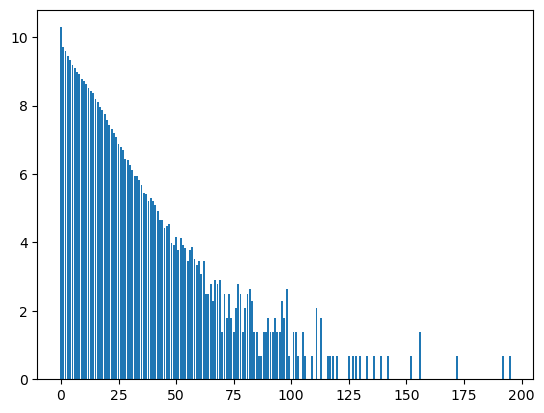

In [31]:
import matplotlib.pyplot as plt
#ancho_barras = [bins[i+1] - bins[i] for i in range(len(bins) - 1)]
#plt.bar(bins[4:-1], gfs_histo[3:-1])
plt.bar(bins[:-1], np.log(histo))
#rango_inicio = 0  # Define el inicio del rango
#rango_fin = 100  # Define el final del rango
#plt.xlim(rango_inicio, rango_fin)  # Establecer el rango en el eje x

#siempre se guarda antes de mostrar
plt.savefig('/home/fernando.huaranca/datosmunin2/Thesis_Neuronal_Network/work/subset_1er_prueba/salidas/gfs_hist.png',dpi=300)
plt.show()


In [26]:
plt.savefig('/home/fernando.huaranca/datosmunin/subset/salidas/gsmap_hist.png',dpi=300)

<Figure size 640x480 with 0 Axes>

# Matriz confusion (codigo extraido de otro repo q habia ehcho)

In [38]:
#Librerias
from sklearn.metrics import confusion_matrix

#Parametros

umbral = 25  #definimos un umbral
print(f'El umbral elegido es {umbral} mm')

#Rutas 
print('Leyendo rutas de archivos')
folder_gfs = '/home/fernando.huaranca/datosmunin/subset/gfs'
folder_gsmap = '/home/fernando.huaranca/datosmunin/subset/gsmap'

#Leo los elementos de cualquiera de las dos carpetas en este caso se llaman igual
FileS = os.listdir(folder_gfs)
#Esto es para que en el primer archivo cree la matriz de confusion
inicio = True

#Porcentaje
total = len(FileS)
i = 0

fallidos = []
print('Cantidad de archivos a leer: ', total)

print('Inicia el bucle')
for file in FileS:

    i = i +1
    porcentaje = (i/total) * 100

    #Ruta de los archivos de GFS
    try:
        path_gfs = os.path.join(folder_gfs,file)

        #Ruta de los archivos de GSMAP
        path_gsmap = os.path.join(folder_gsmap,file)

        #Cargamos los archivos npz
        gfs = np.load(path_gfs)
        gsmap = np.load(path_gsmap)

        #Hacemos un reshape a 1dimension y tomamos los valores mayores a ese rango
        label = gfs['pp_daily'].ravel() >= umbral
        target = gsmap['pp_daily'].ravel() >=umbral

        #Definimos la matriz de confusion 
        #y_true: Los valores verdaderos
        #y_pred: Los valores predichos
        #labels: -True: LLovio mas del umbral
        #        -False: Llovio menos del umbral
        #TP, FN,FP,TN

        #Para el primer archivo que lee crea la matriz de confusion
        if inicio:
            cm = confusion_matrix(y_true=target,y_pred=label,labels=[True,False])

            #Hacemos que la variable boleana pase a ser false
            inicio = False
        else:
            cm = np.sum([cm,confusion_matrix(y_true=target,y_pred=label,labels=[True,False])],axis=0)
    
    except Exception as e:
        print(f'Error al procesar el archivo {file}: {str(e)}')
        fallidos.append(file)

    print('El porcentaje es: ',porcentaje,'%')
    print('Cantidad de archivos fallados: ',len(fallidos))


print(f'Guardando matriz de confusion para el umbral {umbral} mm')
outpath = f'/home/fernando.huaranca/datosmunin2/Thesis_Neuronal_Network/work/subset_1er_prueba/salidas/cm_umbral_{umbral}_mm.npz'
np.savez(outpath,cm = cm,umbral = umbral)

print('Proceso completado!')

El umbral elegido es 25 mm
Leyendo rutas de archivos
Cantidad de archivos a leer:  31
Inicia el bucle
El porcentaje es:  3.225806451612903 %
Cantidad de archivos fallados:  0
El porcentaje es:  6.451612903225806 %
Cantidad de archivos fallados:  0
El porcentaje es:  9.67741935483871 %
Cantidad de archivos fallados:  0
El porcentaje es:  12.903225806451612 %
Cantidad de archivos fallados:  0
El porcentaje es:  16.129032258064516 %
Cantidad de archivos fallados:  0
El porcentaje es:  19.35483870967742 %
Cantidad de archivos fallados:  0
El porcentaje es:  22.58064516129032 %
Cantidad de archivos fallados:  0
El porcentaje es:  25.806451612903224 %
Cantidad de archivos fallados:  0
El porcentaje es:  29.03225806451613 %
Cantidad de archivos fallados:  0
El porcentaje es:  32.25806451612903 %
Cantidad de archivos fallados:  0
El porcentaje es:  35.483870967741936 %
Cantidad de archivos fallados:  0
El porcentaje es:  38.70967741935484 %
Cantidad de archivos fallados:  0
El porcentaje es:  